In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### BMI Distribution before imputation

In [48]:
# Load dataset
df_original = pd.read_excel("updated_imd_data.xlsx") 
df_before = df_original.copy()
bmi_before = df_before['bmi']

# Summary stats
print("=== Summary Statistics ===")
print("\nBefore Imputation:")
print(bmi_before.describe())


print(f"Missing values before imputation: {df_original['bmi'].isnull().sum()}")

=== Summary Statistics ===

Before Imputation:
count    32527.000000
mean        29.817740
std          7.282687
min         15.400000
25%         24.675000
50%         28.385000
75%         33.820000
max         74.204000
Name: bmi, dtype: float64
Missing values before imputation: 13029


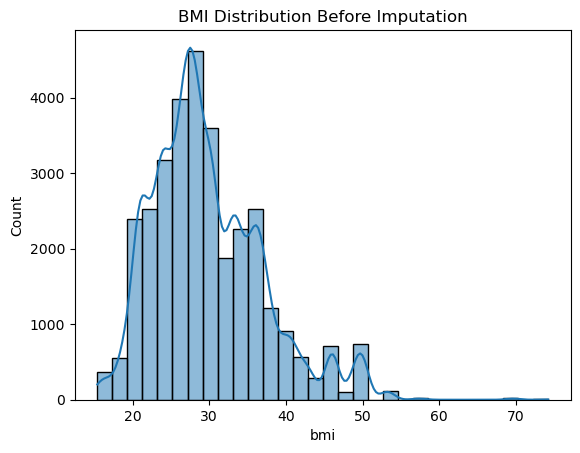

In [18]:
# Load the Excel file
file_path = "updated_imd_data.xlsx"
df = pd.read_excel(file_path)

sns.histplot(df["bmi"], bins=30, kde=True)
plt.title("BMI Distribution Before Imputation")
plt.show()


In [6]:
# Load the Excel file
file_path = "updated_imd_data.xlsx"
df = pd.read_excel(file_path)

# Convert categorical column "Sex" into numerical format
df["sex"] = df["sex"].map({"Male": 0, "Female": 1})

# Filter rows with BMI present for training
df_train = df.dropna(subset=["bmi"])

# Define training data using "ethnicgroup" as a feature
X_train = df_train[["age", "sex", "IMD"]]
y_train = df_train["bmi"]

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Identify rows with missing BMI
df_missing = df[df["bmi"].isna()]

# Select features for prediction (excluding new columns)
X_missing = df_missing[["age", "sex", "IMD"]]

# Predict BMI values and update original dataset
df.loc[df["bmi"].isna(), "bmi"] = model.predict(X_missing)

# Function to classify BMI based on ethnicity while handling missing values
def classify_bmi(row):
    asian = {"Chinese", "Indian", "Bangladeshi", "Pakistani", "Other Asian"}
    black = {"Black", "Caribbean"}
    bmi   = row["bmi"]

    if row["ethnicgroup"] in asian:
        limits = (18.5, 23, 27.5)
    elif row["ethnicgroup"] in black:
        limits = (18.5, 25, 30)
    else:                                   # White, Other, or anything else
        limits = (18.5, 25, 30)

    if bmi < limits[0]:
        return "Underweight"
    elif bmi < limits[1]:
        return "Healthy"
    elif bmi < limits[2]:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df.apply(classify_bmi, axis=1)

# Apply classification function to dataset
df["BMI_Category"] = df.apply(classify_bmi, axis=1)

# Restore "Male" & "Female"
df["sex"] = df["sex"].map({0: "Male", 1: "Female"})


# Save the updated data back to Excel
df.to_excel("updated_bmi_data.xlsx", index=False)

# Display first few rows to check
print(df.head())


            patID   sex date_prescribe Indexdate_Furosemide  \
0  HF202400017513  Male     2019-01-07           2008-04-15   
1  HF202400017513  Male     2018-11-26           2008-04-15   
2  HF202400017513  Male     2019-08-26           2008-04-15   
3  HF202400017513  Male     2014-10-10           2008-04-15   
4  HF202400017513  Male     2018-12-10           2008-04-15   

                  drugname  quantity  duration  estcost dosage  daily_dose  \
0  Furosemide 40mg tablets         7         7   0.1428    NaN         NaN   
1  Furosemide 40mg tablets         7         7   0.1428    NaN         NaN   
2  Furosemide 40mg tablets         7         7   0.5222    NaN         NaN   
3  Furosemide 40mg tablets         7         7   0.2051    NaN         NaN   
4  Furosemide 40mg tablets         7         7   0.1428    NaN         NaN   

   ...        bmi  IMD  Region     dosage description Strength (mg)  \
0  ...  29.813704    5  London  one to be taken daily            40   
1  ...  29

### Validating the BMI imputation


In [50]:
# After Imputation
# Reload after imputation
df_after = df.copy()
bmi_after = df_after['bmi']

print("\nAfter Imputation:")
print(bmi_after.describe())




After Imputation:
count    45556.000000
mean        29.407977
std          6.187703
min         15.400000
25%         26.566250
50%         28.385000
75%         31.025000
max         74.204000
Name: bmi, dtype: float64


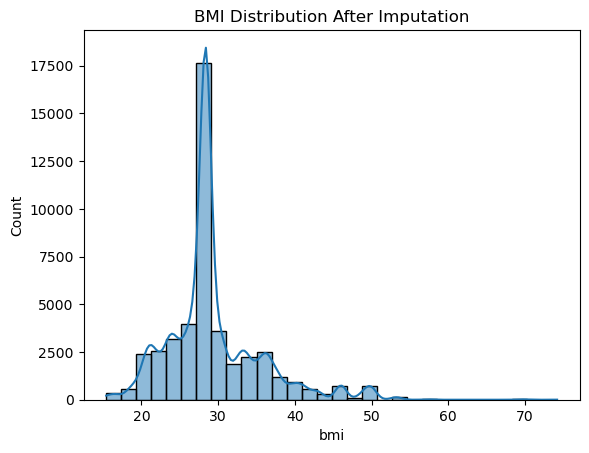

In [54]:
sns.histplot(bmi_after, bins=30, kde=True)
plt.title("BMI Distribution After Imputation")
plt.show()


- The histogram helps to confirm whether the BMI values follows expected patterns
- The peak around a BMI of 30 suggests the dataset aligns with standard population distributions